In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import time_series

%reload_ext autoreload

# Load dataset

In [19]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/dummy_topup_data.csv", sep=",", index_col=None)

In [20]:
df

datetime  sum_amount  avg_amount_per_user  anomaly
0      2017-05-16 00:10:00   26.323942            16.474923    False
1      2017-05-16 00:40:00   25.363050            15.325484    False
2      2017-05-16 01:10:00   25.443192            11.128038    False
3      2017-05-16 01:40:00   26.149407            10.833380    False
4      2017-05-16 02:10:00   25.801580            10.858455    False
...                    ...         ...                  ...      ...
12269  2018-01-26 14:40:00   26.103956            13.934151    False
12270  2018-01-26 15:10:00   26.499405            14.409160    False
12271  2018-01-26 15:40:00   26.380532            14.416234    False
12272  2018-01-26 16:10:00   26.207231            14.174578    False
12273  2018-01-26 16:40:00   24.965879            13.680370    False

[12274 rows x 4 columns]

In [51]:
# Load dataset
df11 = pd.read_csv(f'E:\gitlab\machine-learning\dataset\RestaurantVisitors.csv',index_col='date',parse_dates=True)
df11.index.freq = 'D'
df1 = df11.dropna()

In [28]:
# Change the dtype of selected columns
cols = ['rest1','rest2','rest3','rest4','total']
for col in cols:
    df1[col] = df1[col].astype(int)

In [29]:
df1

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                         
2016-01-01     Friday        1  New Year's Day     65     25     67    139   
2016-01-02   Saturday        0              na     24     39     43     85   
2016-01-03     Sunday        0              na     24     31     66     81   
2016-01-04     Monday        0              na     23     18     32     32   
2016-01-05    Tuesday        0              na      2     15     38     43   
...               ...      ...             ...    ...    ...    ...    ...   
2017-04-18    Tuesday        0              na     30     30     13     18   
2017-04-19  Wednesday        0              na     20     11     30     18   
2017-04-20   Thursday        0              na     22      3     19     46   
2017-04-21     Friday        0              na     38     53     36     38   
2017-04-22   Saturday        0              na     97     20     50     59   

            total  
date               
2016-01-01    296  
2016-01-02    191  
2016-01-03    202  
2016-01-04    105  
2016-01-05     98  
...           ...  
2017-04-18     91  
2017-04-19     79  
2017-04-20     90  
2017-04-21    165  
2017-04-22    226  

[478 rows x 8 columns]

In [32]:
df2 = pd.read_csv(f'E:\gitlab\machine-learning\dataset\MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df2=df2.dropna()

In [33]:
df2

MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-01-02     35.0     50.0     43.0      657    1756
2014-01-03     36.0     45.0     41.0      657    1757
2014-01-04     32.0     41.0     37.0      658    1757
2014-01-05     24.0     38.0     31.0      658    1758
...             ...      ...      ...      ...     ...
2018-12-26     35.0     45.0     40.0      654    1752
2018-12-27     33.0     44.0     39.0      655    1752
2018-12-28     33.0     47.0     40.0      655    1753
2018-12-29     36.0     47.0     42.0      655    1753
2018-12-30     39.0     52.0     46.0      656    1754

[1821 rows x 5 columns]

# Initial function

## Convert datetime column to pandas.datetime dtype and setting it as the index of the dataframe

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()

## moving average

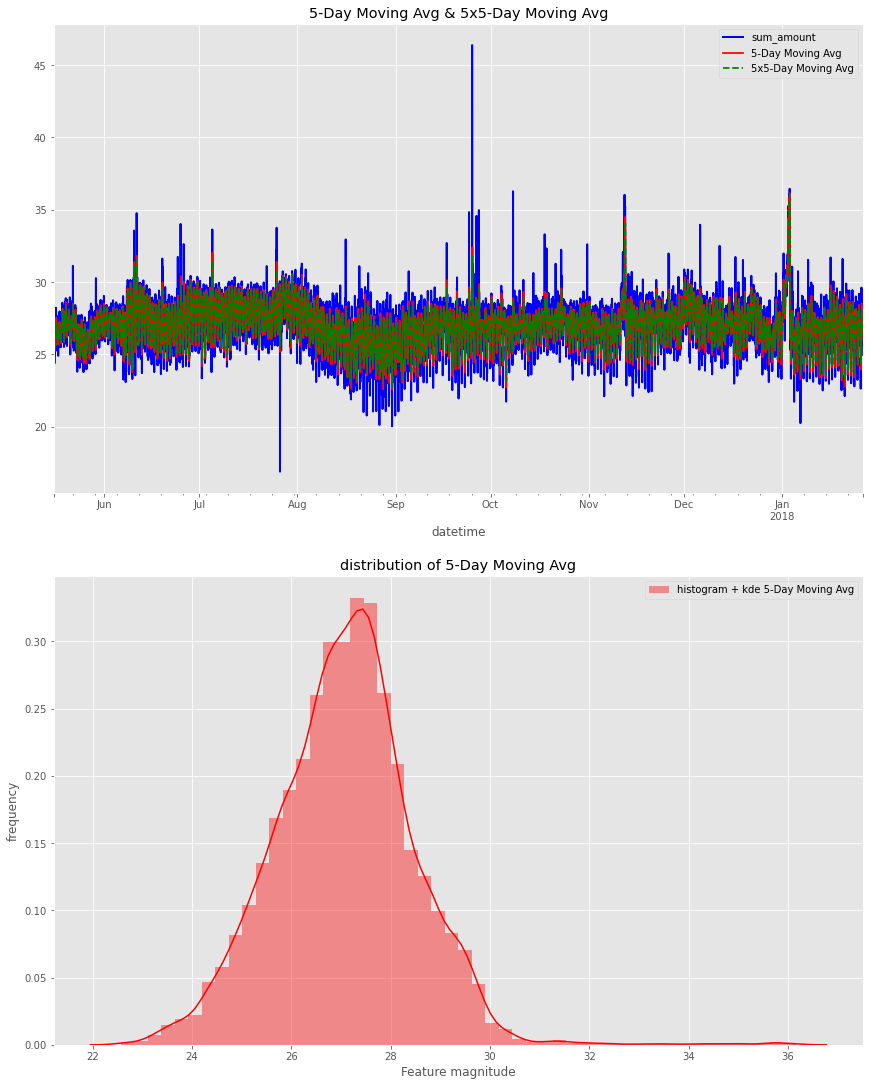

In [10]:
time_series.moving_average(df,"sum_amount",5,bins=50,show_mxm=True)

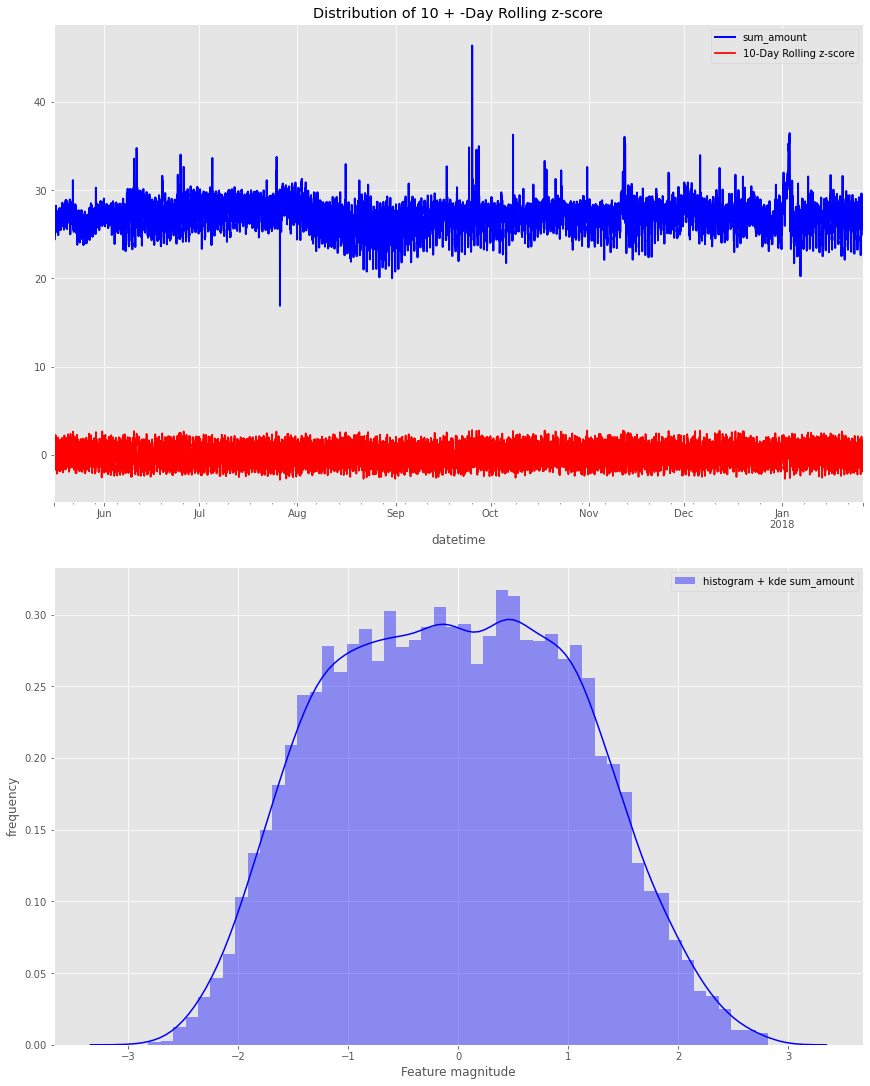

In [11]:
time_series.z_score(df,"sum_amount",10,bins=50)

In [20]:
df

sum_amount  avg_amount_per_user  anomaly  \
datetime                                                        
2017-05-16 00:10:00   26.323942            16.474923    False   
2017-05-16 00:40:00   25.363050            15.325484    False   
2017-05-16 01:10:00   25.443192            11.128038    False   
2017-05-16 01:40:00   26.149407            10.833380    False   
2017-05-16 02:10:00   25.801580            10.858455    False   
...                         ...                  ...      ...   
2018-01-26 14:40:00   26.103956            13.934151    False   
2018-01-26 15:10:00   26.499405            14.409160    False   
2018-01-26 15:40:00   26.380532            14.416234    False   
2018-01-26 16:10:00   26.207231            14.174578    False   
2018-01-26 16:40:00   24.965879            13.680370    False   

                     5-Day Moving Avg  5x5-Day Moving Avg  \
datetime                                                    
2017-05-16 00:10:00         25.816234           25.816234   
2017-05-16 00:40:00         25.816234           25.816234   
2017-05-16 01:10:00         25.816234           25.816234   
2017-05-16 01:40:00         25.816234           25.816234   
2017-05-16 02:10:00         25.816234           25.816234   
...                               ...                 ...   
2018-01-26 14:40:00         26.931094           27.334602   
2018-01-26 15:10:00         26.912292           27.203405   
2018-01-26 15:40:00         26.544841           27.013961   
2018-01-26 16:10:00         26.494358           26.832050   
2018-01-26 16:40:00         26.031401           26.582797   

                     10-Day Rolling z-score  
datetime                                     
2017-05-16 00:10:00                0.370560  
2017-05-16 00:40:00                0.370560  
2017-05-16 01:10:00                0.370560  
2017-05-16 01:40:00                0.370560  
2017-05-16 02:10:00                0.370560  
...                                     ...  
2018-01-26 14:40:00               -1.522015  
2018-01-26 15:10:00               -0.865601  
2018-01-26 15:40:00               -0.856319  
2018-01-26 16:10:00               -0.941314  
2018-01-26 16:40:00               -1.822190  

[12274 rows x 6 columns]

## Run ADF test to check if data is stationary 

In [24]:
adf_result,adf = time_series.adf_test(df1,'total',autolag='AIC')

Augmented Dickey-Fuller Test:

p-val of the ADF test in dataset: 1.319377094694142e-06
Augmented Dickey-Fuller Test on Sales Data

ADF test statistic       -5.592497
p-value                   0.000001
#lags used               18.000000
#observations           459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test for stationarity

In [81]:
time_series.kpss_test(df1,'total')

Results of KPSS Test:
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has no unit root and is stationary


params      value
0       Test Statistic   0.202363
1              p-value   0.100000
2            Lags Used  18.000000
3   Critical Value 10%   0.347000
4    Critical Value 5%   0.463000
5  Critical Value 2.5%   0.574000
6    Critical Value 1%   0.739000

## ljungbox test

In [40]:
time_series.ljungbox_test(df,'total',10)


Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 0 for p-val = 6.862706191449071e-16

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 1 for p-val = 1.1727714599396097e-18

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 2 for p-val = 1.642497424909801e-33

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 3 for p-val = 1.6780120291192818e-49

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 4 for p-val = 3.5650935135020006e-54

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 5 for p-val = 2.1926348643907715e-64

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 6 for p-val = 4.9

## Durbin-Watson Test 

In [75]:
time_series.dw_test(df1[["holiday",'total']],19)

holiday	:	2.0019	->	indicates no serial correlation
total	:	1.9834	->	indicates no serial correlation


## Cointegration test

In [91]:
time_series.cointegration_test(df1,"holiday",'total',autolag='AIC')

Results of cointegration Test:

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has cointegration


params         value
0      Test Statistic -8.507015e+00
1             p-value  1.576591e-12
2   Critical Value 1% -3.919547e+00
3   Critical Value 5% -3.348969e+00
4  Critical Value 10% -3.053353e+00

## Grangers causation test

Y = total, X = holiday, P Values = [0.0745, 0.0045, 0.0452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007, 0.0013, 0.0012, 0.0001, 0.0001, 0.0002, 0.0012, 0.0111, 0.0064, 0.0054, 0.0103, 0.0097, 0.0199]
Y = holiday, X = total, P Values = [0.0097, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0001, 0.0001, 0.0, 0.0001, 0.0003, 0.0005, 0.0002]


holiday_x  total_x
holiday_y        1.0      0.0
total_y          0.0      1.0

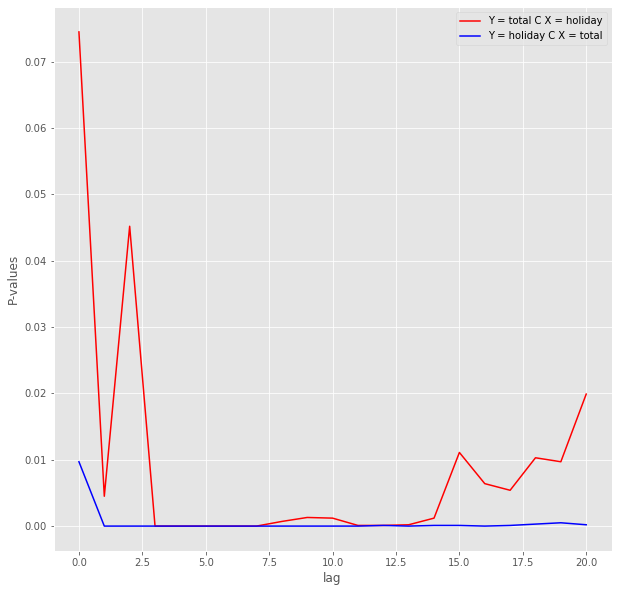

In [16]:
time_series.grangers_causation_test(df1,["holiday",'total'],
                                      21,test='ssr_chi2test',verbose=True)

## max lag

In [10]:
time_series.max_lag(df1[["holiday",'total']],21)

# Plot function

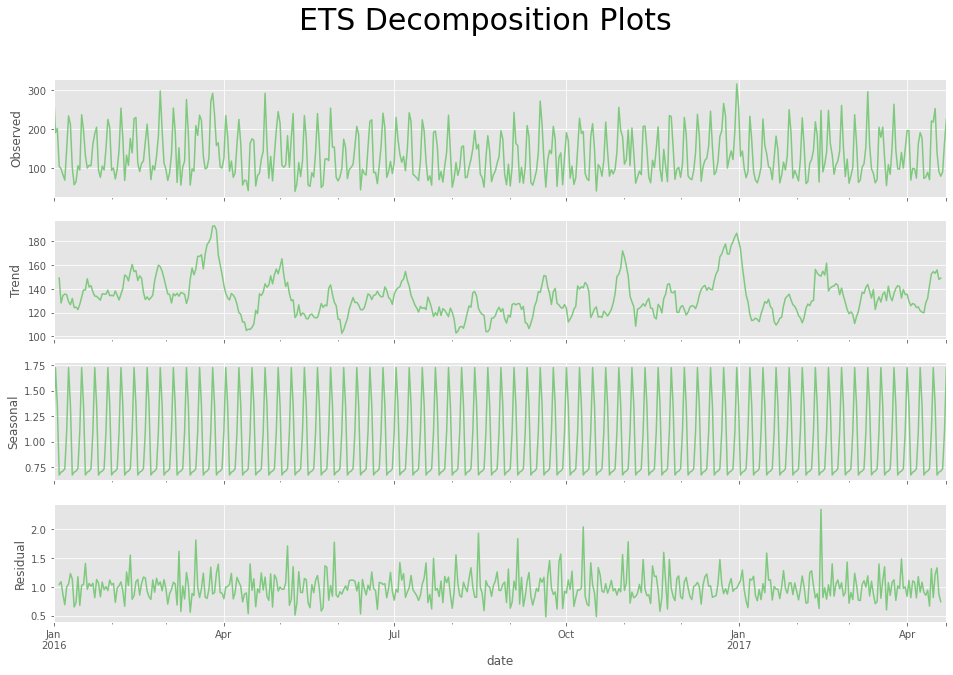

In [12]:
time_series.decomposition_plot(df1,'total','multiplicative')

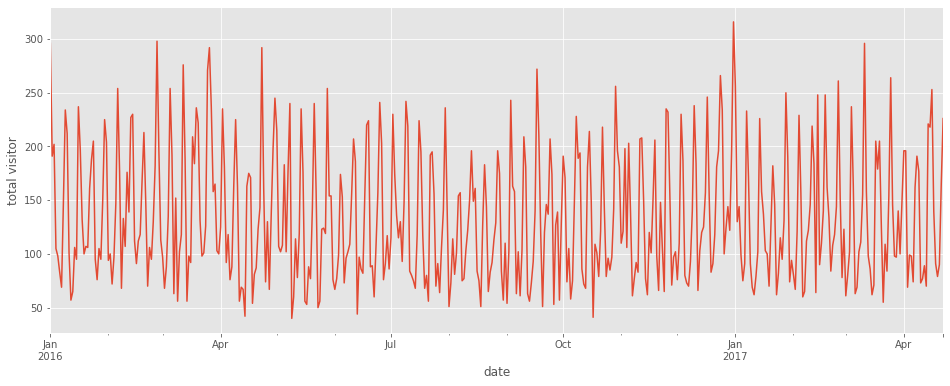

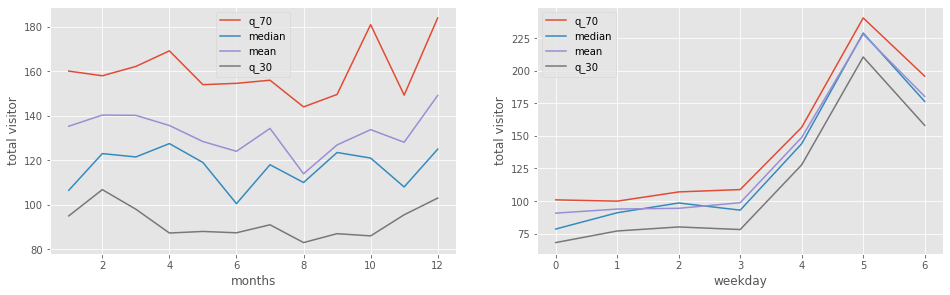

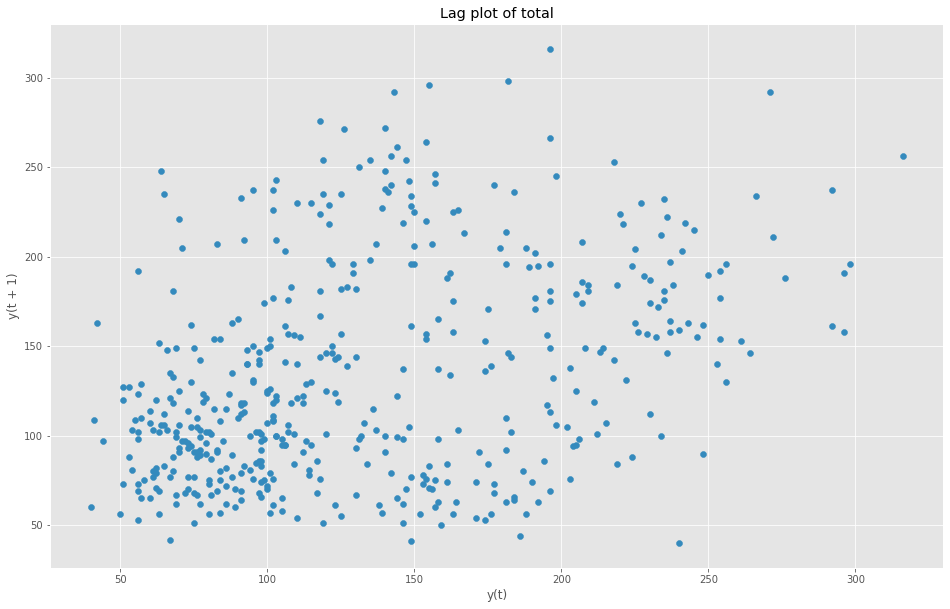

In [14]:
time_series.timeseries_plot(df1,'total','total visitor')

In [15]:
time_series.plot_dates_values(df1.index, df1['total'],'total visitor')

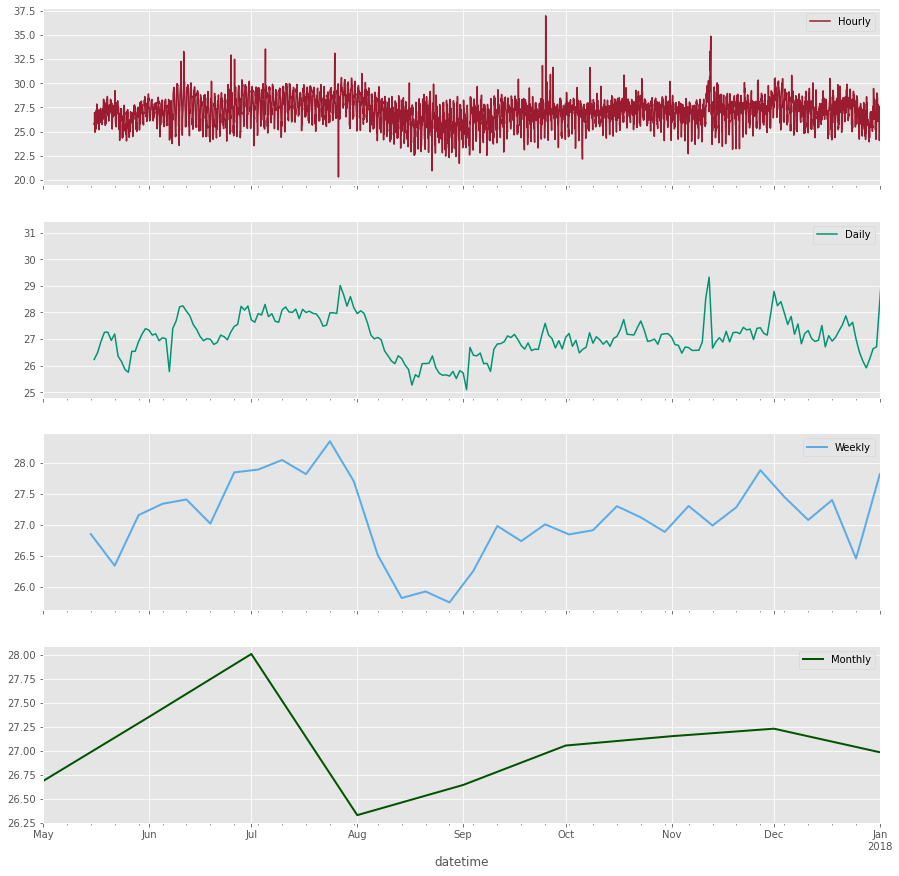

In [21]:
time_series.detail_ts_plot(df,"datetime",'sum_amount')

### Plot ACF and PACF Plots to get idea of orders

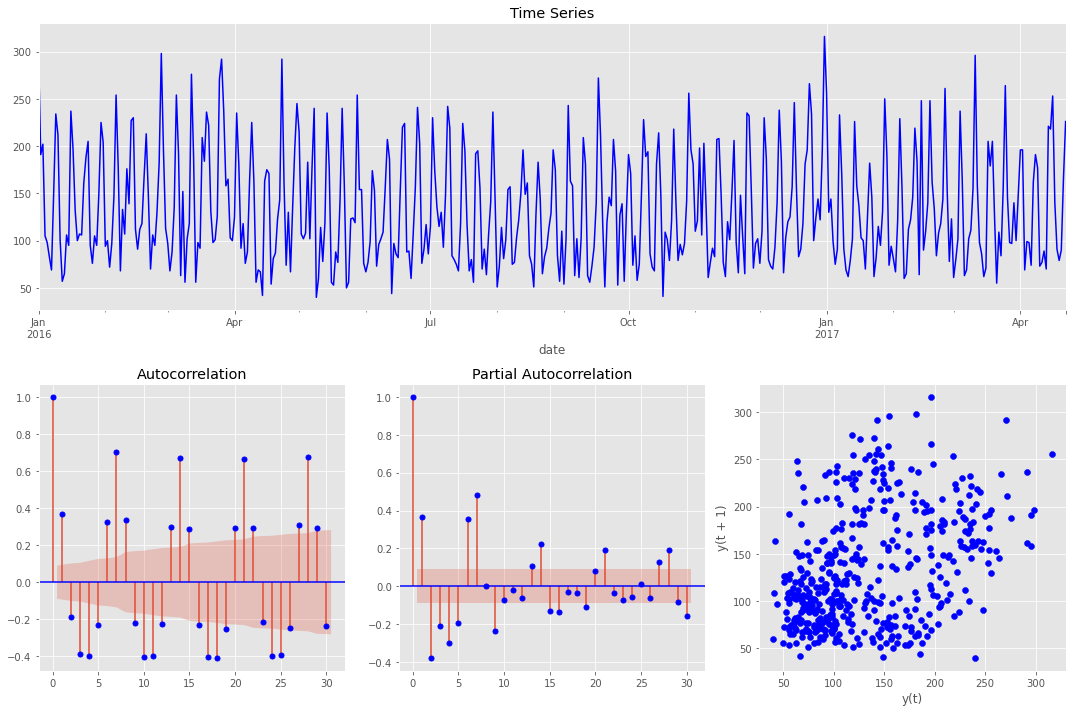

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  478
Model:                     ARMA(1, 0)   Log Likelihood               -2674.748
Method:                           mle   S.D. of innovations             65.042
Date:                Tue, 10 Aug 2021   AIC                           5353.496
Time:                        11:24:47   BIC                           5361.836
Sample:                             0   HQIC                          5356.775
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9002      0.020     44.487      0.000       0.861       0.940
                                    Roots                                    
                  Real          Imaginary           M

In [36]:
ar1 = time_series.autocorrelation_plot(df,'total',30)

# Transformation

In [40]:
df1["growth_total"] = time_series.growth_data(df1,'total')

In [41]:
df1

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                         
2016-01-01     Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02   Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03     Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04     Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05    Tuesday        0              na    2.0   15.0   38.0   43.0   
...               ...      ...             ...    ...    ...    ...    ...   
2017-04-18    Tuesday        0              na   30.0   30.0   13.0   18.0   
2017-04-19  Wednesday        0              na   20.0   11.0   30.0   18.0   
2017-04-20   Thursday        0              na   22.0    3.0   19.0   46.0   
2017-04-21     Friday        0              na   38.0   53.0   36.0   38.0   
2017-04-22   Saturday        0              na   97.0   20.0   50.0   59.0   

            total  growth_total  
date                             
2016-01-01  296.0           NaN  
2016-01-02  191.0        -105.0  
2016-01-03  202.0          11.0  
2016-01-04  105.0         -97.0  
2016-01-05   98.0          -7.0  
...           ...           ...  
2017-04-18   91.0         -49.0  
2017-04-19   79.0         -12.0  
2017-04-20   90.0          11.0  
2017-04-21  165.0          75.0  
2017-04-22  226.0          61.0  

[478 rows x 9 columns]

# Classic model

## Auto arima

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  478
Model:                     ARMA(5, 5)   Log Likelihood               -2357.365
Method:                           mle   S.D. of innovations             32.853
Date:                Sun, 29 Aug 2021   AIC                           4736.729
Time:                        21:57:46   BIC                           4782.595
Sample:                             0   HQIC                          4754.761
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.8003        nan        nan        nan         nan         nan
ar.L2.y       -2.2410      0.001  -2239.872      0.000      -2.243      -2.239
ar.L3.y        2.2396      0.001   2197.319      0.0

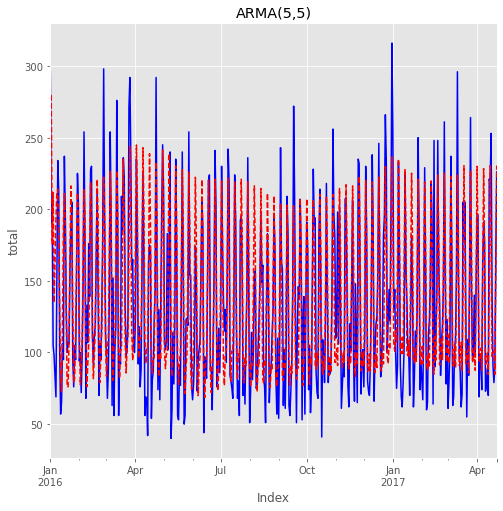

In [58]:
aicVal,arma_obj_fin = time_series.arma_opt(df1,'total',6,6)

In [59]:
aicVal

In [60]:
time_series.autoarima(df1,'total',m=1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  478
Model:               SARIMAX(4, 0, 3)   Log Likelihood               -2434.343
Date:                Sun, 29 Aug 2021   AIC                           4886.686
Time:                        21:58:06   BIC                           4924.212
Sample:                             0   HQIC                          4901.439
                                - 478                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    123.3392     30.913      3.990      0.000      62.750     183.928
ar.L1          1.1629      0.316      3.678      0.000       0.543       1.783
ar.L2         -1.0476      0.411     -2.549      0.011      -1.853      -0.242
ar.L3          0.1076      0.340      0.317      0.752      -0.559       0.774
ar.L4         -0.1512      0.059     -2.554      0.011      -0.267      -0.035
ma.L1         -1.0989      0.323     -3.403      0.001      -1.732      -0.466
ma.L2          0.8511      0.391      2.176      0.030       0.085       1.618
ma.L3          0.0998      0.314      0.318      0.750      -0.515       0.715
sigma2      1617.8059    108.602     14.897      0.000    1404.950    1830.661
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                24.78
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.48
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
time_series.autoarima(df1,'total',m=7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.245
Date:                   Sun, 29 Aug 2021   AIC                           4770.490
Time:                           12:00:03   BIC                           4787.169
Sample:                                0   HQIC                          4777.048
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0723      1.600      2.545      0.011       0.936       7.209
ar.S.L7        0.9680      0.012     81.909      0.000       0.945       0.991
ma.S.L7       -0.7313      0.051    -14.451      0.000      -0.830      -0.632
sigma2      1248.4033     75.522     16.530      0.000    1100.384    1396.423
===================================================================================
Ljung-Box (L1) (Q):                  14.32   Jarque-Bera (JB):                59.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.71
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Arima_model

In [36]:
model = time_series.arima_model(df2,'AvgTemp',test=None,p=1,d=0,q=5,intervals=None)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                     ARMA(1, 5)   Log Likelihood               -4138.130
Method:                       css-mle   S.D. of innovations              2.347
Date:                Sun, 29 Aug 2021   AIC                           8292.261
Time:                        12:48:35   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5294      0.787     59.148      0.000      44.988      48.071
ar.L1.AvgTemp     0.9860      0.006    155.003      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1403      0.024     -5.754      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2328      0.024     -9.641      0.000      -0.280      -0.185
ma.L3.AvgTemp    -0.2163      0.025     -8.502      0.000      -0.266      -0.166
ma.L4.AvgTemp    -0.1478      0.023     -6.352      0.000      -0.193      -0.102
ma.L5.AvgTemp    -0.0587      0.024     -2.413      0.016      -0.106      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0142           +0.0000j            1.0142            0.0000
MA.1            1.0867           -0.0000j            1.0867           -0.0000
MA.2            0.0537           -1.8503j            1.8511           -0.2454
MA.3            0.0537           +1.8503j            1.8511            0.2454
MA.4           -1.8566           -1.0630j            2.1394           -0.4172
MA.5           -1.8566           +1.0630j            2.1394            0.4172
-----------------------------------------------------------------------------
"""

In [38]:
print(df2.shape)
train=df2.iloc[:-30]
test=df2.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


### predict test

<AxesSubplot:xlabel='DATE'>

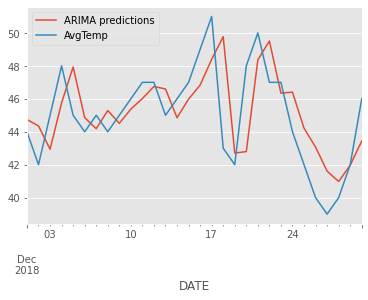

In [39]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

### predict next

<AxesSubplot:>

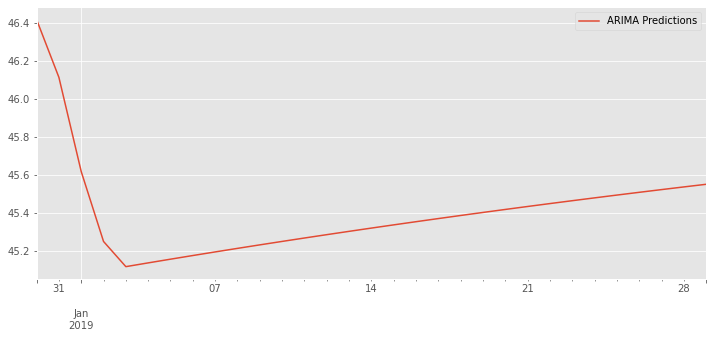

In [43]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
pred=model.predict(start=len(df2),end=len(df2)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
pred.plot(figsize=(12,5),legend=True)

# Sarimax model

In [44]:
len(df1)
print(478-42)
# Set four weeks for testing
train = df1.iloc[:436]
test = df1.iloc[436:]

436


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 29 Aug 2021   AIC                           4457.403
Time:                                   14:12:52   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



Evaluating SARIMA Model with test dataset - MSE Error: 1702.65
Evaluating SARIMA Model with test dataset - RMSE Error: 41.26


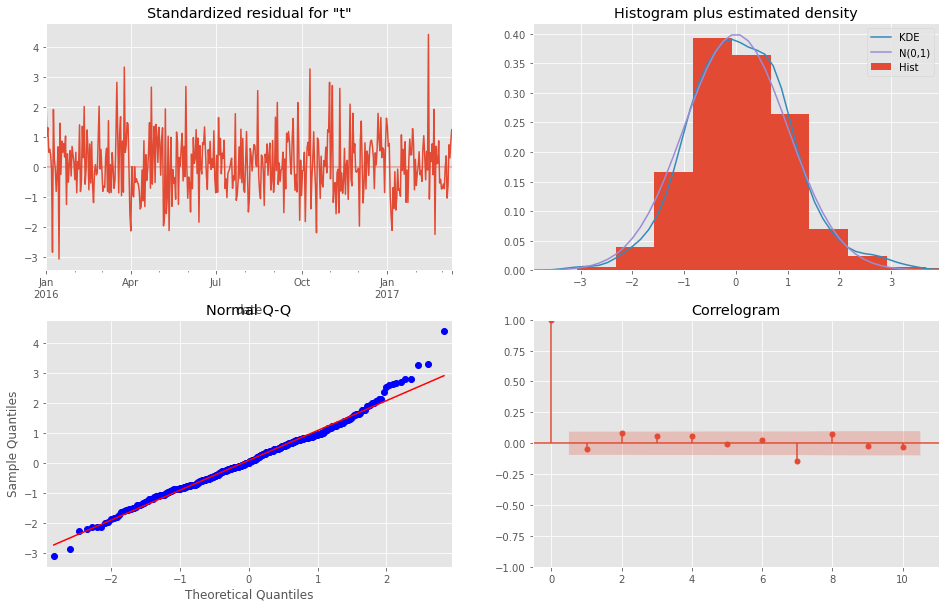

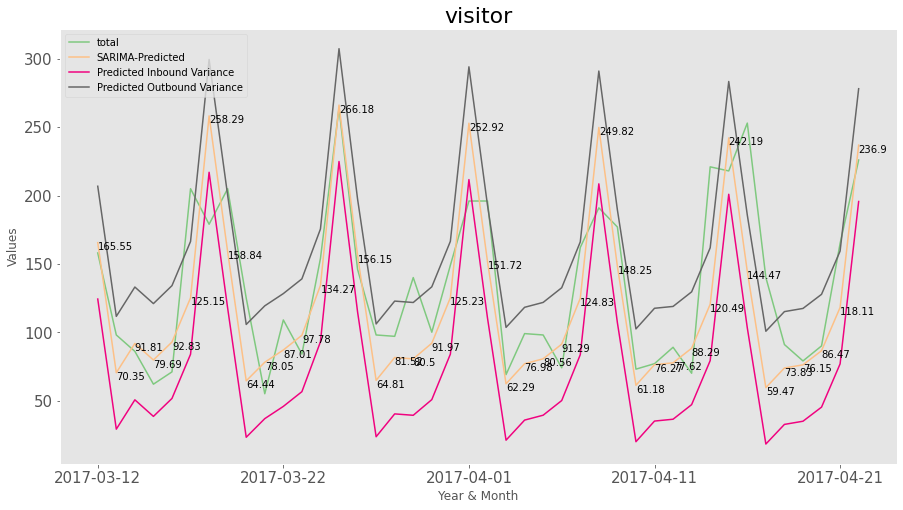

In [45]:
result_1 = time_series.sarimax_model(train,'total',order=(1,0,0),so=(2,0,0,7),title='visitor',test=test)

### Adding the exogenous variable to improve model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2158.482
Date:                           Sun, 29 Aug 2021   AIC                           4326.963
Time:                                   14:13:33   BIC                           4347.352
Sample:                               01-01-2016   HQIC                          4335.010
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.8872      4.241     15.773      0.000      58.576      75.199
ar.L1          0.2145      0.049      4.375      0.000       0.118       0.311
ar.S.L7        0.5147      0.042     12.311      0.000       0.433       0.597
ar.S.L14       0.4575      0.042     10.997      0.000       0.376       0.539
sigma2      1117.4033     73.302     15.244      0.000     973.733    1261.073
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.68   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



Evaluating SARIMA Model with test dataset - MSE Error: 950.67
Evaluating SARIMA Model with test dataset - RMSE Error: 30.83


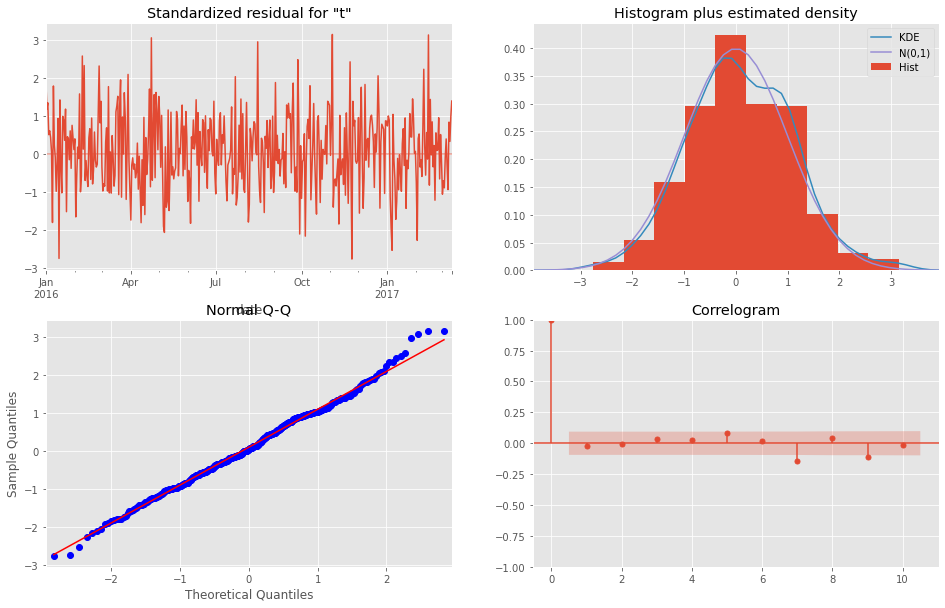

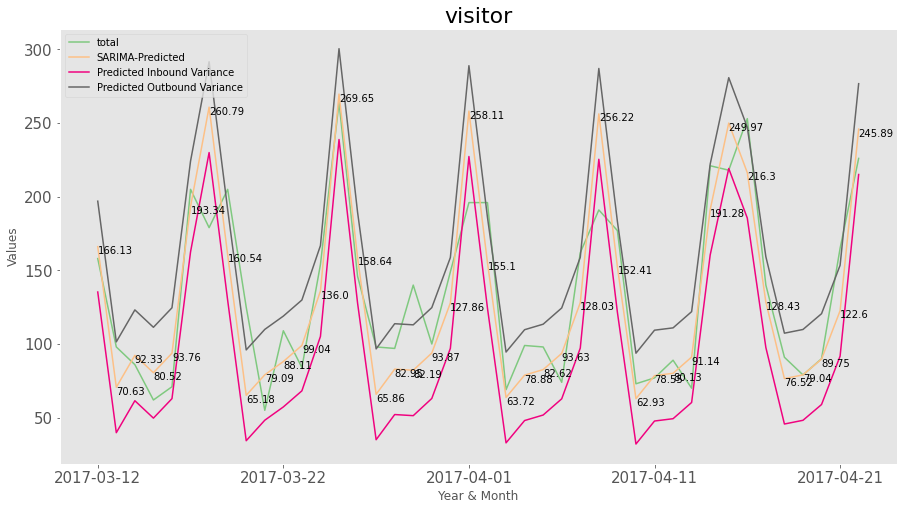

In [46]:
result_2 = time_series.sarimax_model(train,'total',order=(1,0,0),so=(2,0,0,7),title='visitor',exog=True,col_2='holiday',test=test)

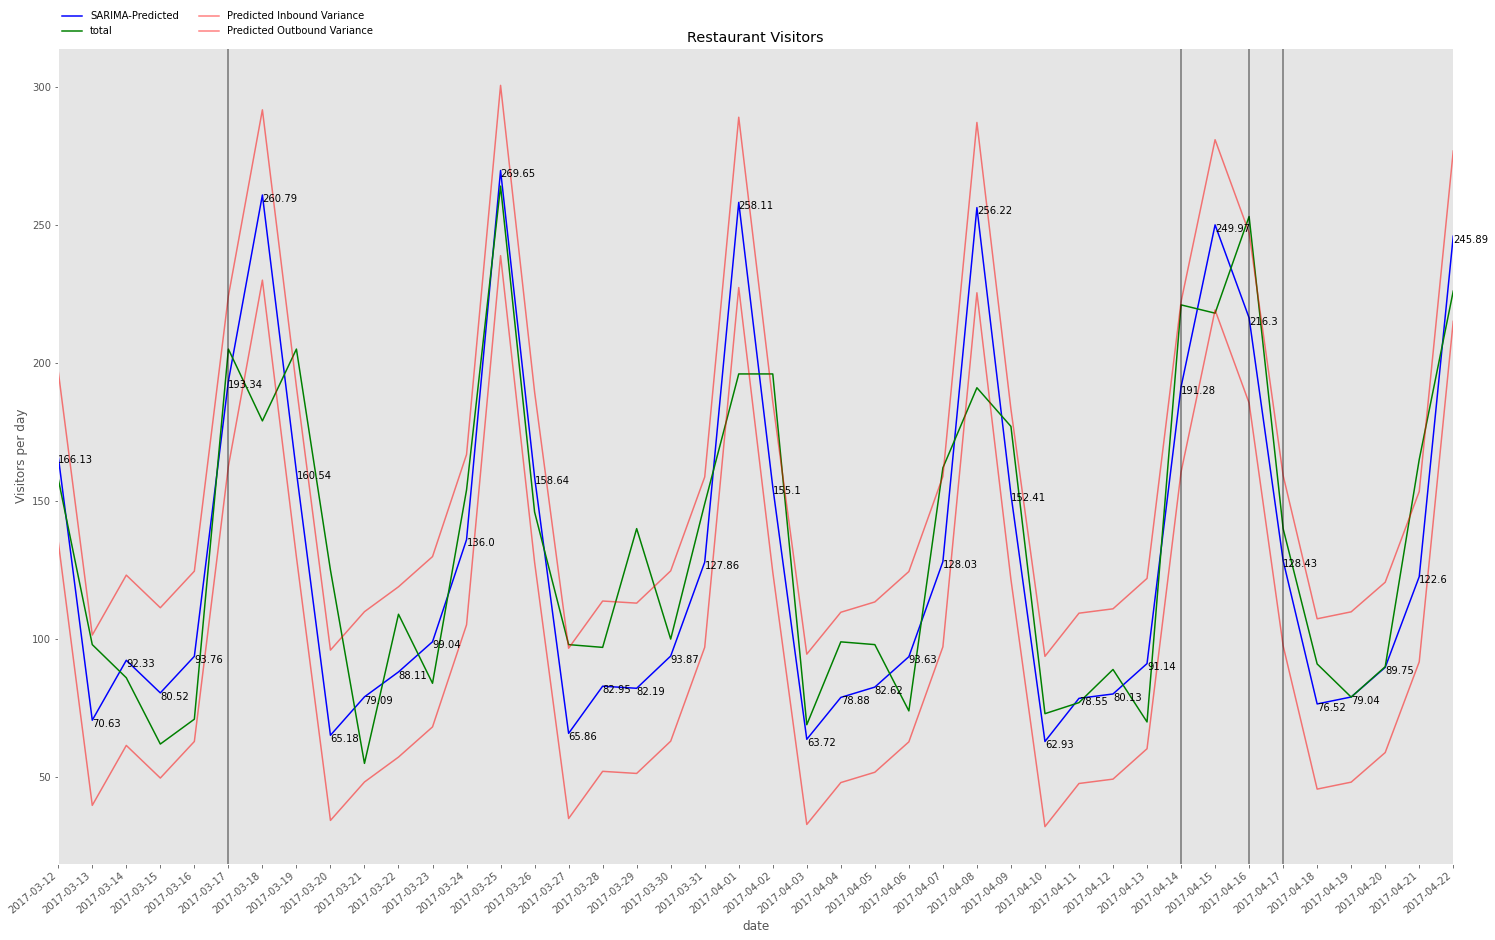

In [47]:
time_series.sarimax_model_plot(result_2,'total','holiday','Restaurant Visitors','date','Visitors per day')

### next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2359.370
Date:                           Sun, 29 Aug 2021   AIC                           4728.741
Time:                                   14:17:31   BIC                           4749.589
Sample:                               01-01-2016   HQIC                          4736.937
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.5828      4.123     16.392      0.000      59.502      75.664
ar.L1          0.1930      0.046      4.179      0.000       0.102       0.284
ar.S.L7        0.5028      0.039     12.984      0.000       0.427       0.579
ar.S.L14       0.4706      0.039     12.168      0.000       0.395       0.546
sigma2      1088.5215     67.378     16.156      0.000     956.464    1220.579
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.67   Prob(JB):                         0.53
Heteroskedasticity (H):               0.86   Skew:                             0.08
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

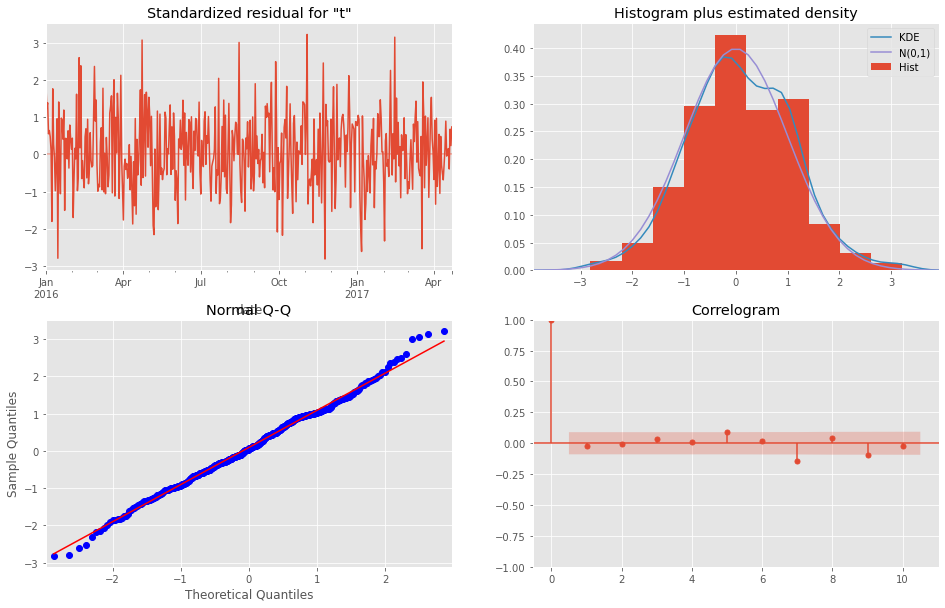

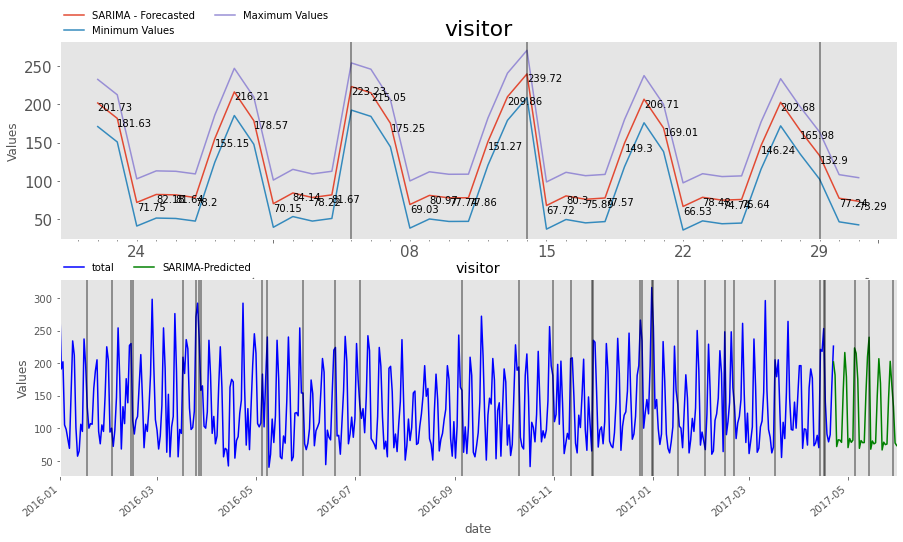

In [52]:
result_all = time_series.sarimax_model(df1,'total',order=(1,0,0),so=(2,0,0,7),title='visitor',exog=True,col_2='holiday',testing=False,n_pred=38,rmses=30.83,main_data_exo=df11)